In [95]:
# Biblioteczki
from ipywidgets import Button, Layout, VBox, HBox # GUI
from IPython.display import display # GUI
import functools # Wysyłanie argumentu do funkcji button.on_click
import numpy as np # Operacje matematyczne
import random as rnd # Losowość
import matplotlib.pyplot as plot # Wyświetlanie tablic (debugowanie)
import math # PI
import cmath # exp
from google.colab import files # Pobranie plików graficznych
import os # Manipulacja systemem plików
import skimage.io # Manipulacja grafikami
from skimage.color import rgb2gray # Konwersja koloru rgb do odcieni szarości

In [96]:
# Stałe w programie
W = 7
H = 7
LEARNING_RATE = 0.001
NOISE_RATE = 0.05
EPOCHS = 1000

In [97]:
# Fukcja dodająca losowy szum do wejścia
def noise(v):
  result = v.copy()
  for i in range(len(result)):
    if rnd.random() < NOISE_RATE:
      result[i] = 1 - result[i]
  return result

def mv(v, x):
  v = np.reshape(v, (H, W))
  result = [[v[i][j] for j in range(W)] for i in range(H)]
  for i in range(H):
    for j in range(W):
      result[i][j] = v[(i-x[0])%H][(j-x[1])%W]
  result = np.reshape(result, -1)
  return result

In [98]:
def DFT(v):
  a = np.abs(np.fft.fft(v))
  a[0] = 0
  return a/np.amax(a)

In [99]:
# Reprezentacje cyfr
digits = [[] for i in range(10)]
digits[0] = [[1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[1] = [[0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[2] = [[0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[3] = [[1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[4] = [[0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[5] = [[1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[6] = [[1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[7] = [[1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[8] = [[0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
digits[9] = [[1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]

In [100]:
# Dane uczące
data = []
for i in range(10):
  digits[i] = np.reshape(digits[i], -1)
  tab = [digits[i][j] * 0.8 + 0.1 for j in range(len(digits[i]))]
  data.append((tab, i))

In [101]:
'''f = files.upload()
directory = 'images'
!mkdir images
!mv *.png images/
for filename in os.listdir(directory):
  imagePath = os.path.join(directory, filename)
  image = skimage.io.imread(imagePath)
  image = rgb2gray(image).reshape(-1)
  
  tab = []
  for pixel in image:
      if len(tab) % W == W-1:
        tab.append(0)
      if len(tab) % W == 0:
        tab.append(0)

      if pixel == 0:
        tab.append(0)
      else:
        tab.append(1)
  tab.append(0)

  data.append((np.concatenate((tab, DFT(tab))), int(filename[0])))'''

"f = files.upload()\ndirectory = 'images'\n!mkdir images\n!mv *.png images/\nfor filename in os.listdir(directory):\n  imagePath = os.path.join(directory, filename)\n  image = skimage.io.imread(imagePath)\n  image = rgb2gray(image).reshape(-1)\n  \n  tab = []\n  for pixel in image:\n      if len(tab) % W == W-1:\n        tab.append(0)\n      if len(tab) % W == 0:\n        tab.append(0)\n\n      if pixel == 0:\n        tab.append(0)\n      else:\n        tab.append(1)\n  tab.append(0)\n\n  data.append((np.concatenate((tab, DFT(tab))), int(filename[0])))"

In [102]:
test_data = []
for i in range(len(data)):
  for j in range(0, 2):
    for k in range(0, 3):
      tab = mv(data[i][0], [j, k])
      test_data.append((tab, data[i][1]))

In [103]:
# Perceptron
class Perceptron():
  def __init__(self, size=W*H, learning_rate=LEARNING_RATE, epochs=EPOCHS):
    self.size = size
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = (np.random.random(2*size+1)) / 100
    self.errors = []
  
  def train(self, training_data):
    for _ in range(self.epochs):
      e = 0
      rnd.shuffle(training_data)
      for input, label in training_data:
        x = self.noise(input.copy())
        prediction = self.predict(x)
        self.weights += self.learning_rate * (label-prediction) * np.concatenate([[1], x, DFT(x)]) * self.dev(prediction)
        e += (label-prediction)**2
      self.errors.append(e)

  def predict(self, input):
    sumation = np.dot(np.concatenate([[1], input, DFT(input)]), self.weights)
    return self.activation(sumation)
  
  def activation(self, x):
    return 1 / (1 + np.exp(-x))

  def dev(self, x):
    return x*(1-x)

  def noise(self,x):
      rand=np.random.randint(0,len(x)-1)
      x[rand]=1.0-x[rand]
      return x


In [104]:
# Lista 10 perceptronów
perceptrons = [Perceptron() for _ in range(10)]

In [105]:
# Funkcje uruchamiane przez naciśnięcie buttonów

# Zaaktualizowanie panelu (7x7) 
def update():
  for i in range(len(buttons)):
    if table[i] == 0:
      buttons[i].style.button_color = 'white'
    else:
      buttons[i].style.button_color = 'black'

# Zmiana odpowiedniego pixela
def on_button_clicked(button, id):
    table[id] = 1-table[id]
    update()

# Wyświetlenie odpowiedniej cyfry na panelu
def display_digit(button):
  table[:] = digits[int(button.description)].copy()
  update()

# Translacja liczb
def move(button):
  if button.description == "^":
    v = [1, 0]
  elif button.description == "v":
    v = [-1, 0]
  elif button.description == "<":
    v = [0, 1]
  elif button.description == ">":
    v = [0, -1]
  
  table[:] = np.reshape(table, (H, W))
  copy_of_table = [[table[i][j] for j in range(W)] for i in range(H)]
  for i in range(H):
    for j in range(W):
      table[i][j] = copy_of_table[(i+v[0])%H][(j+v[1])%W]
  table[:] = np.reshape(table, -1)
  update()

# Wyczyszczenie panelu
def clear(button):
  table[:] = np.zeros(W*H)
  update()

# Dodanie losowego szumu
def make_noise(button):
  table[:] = noise(table)
  update()

# Trenowanie perceptronów
def train(button):
  print("Uczenie... ", end="")
  for i in range(len(perceptrons)):
    training_data = []
    for input, label in test_data:
      if label == i:
        training_data.append((input, 0.9))
      else:
        training_data.append((input, 0.1))
    perceptrons[i].train(training_data)
  test()

def test():
  score = 0
  for input, label in test_data:
    predictions = [perceptron.predict(input) for perceptron in perceptrons] 
    result = 0
    for i, prediction in enumerate(predictions):
      if prediction > predictions[result]:
        result = i
    if result == label:
      score += 1
  print(score, "/", len(test_data))
    

# Predykcja
def predict(button):
  predictions = [perceptron.predict(table) for perceptron in perceptrons] 
  result = 0
  for i, prediction in enumerate(predictions):
    if prediction > predictions[result]:
      result = i
  print(result)


In [106]:
# Interfejs graficzny

# Tworzenie buttonów
arrow_names = ["^", "v", "<", ">"]
buttons = [Button(layout=Layout(width="25px", height="25px")) for i in range(W*H)]
digit_buttons = [Button(description=str(i), layout=Layout(width="35px", height="35px")) for i in range(10)]
arrow_buttons = [Button(description=arrow_names[i], layout=Layout(width="35px", height="35px")) for i in range(4)]
train_button = Button(description="Trenuj", layout=Layout(width="141px", height="25px"))
predict_button = Button(description="Sprawdź", layout=Layout(width="141px", height="25px"))
clear_button = Button(description="Wyczyść", layout=Layout(width="141px", height="25px"))
noise_button = Button(description="Dodaj szum", layout=Layout(width="141px", height="25px"))
table = [0 for i in range(W*H)]

# Wyświetlanie buttonów
box = VBox([HBox([buttons[W*i+j] for j in range(W)]) for i in range(H)])
display(box)
box = VBox([HBox([digit_buttons[5*i+j] for j in range(5)]) for i in range(2)])
display(box)
box = HBox(arrow_buttons)
display(box)
display(train_button)
display(predict_button)
display(clear_button)
display(noise_button)
update()

# Dodanie funkcji do uchwytu on_click
for i in range(W*H):
  buttons[i].on_click(functools.partial(on_button_clicked, id=i))
for i in range(10):
  digit_buttons[i].on_click(display_digit)
for i in range(4):
  arrow_buttons[i].on_click(move)
train_button.on_click(train)
predict_button.on_click(predict)
clear_button.on_click(clear)
noise_button.on_click(make_noise)

Button(description='Trenuj', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Sprawdź', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Wyczyść', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Dodaj szum', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Uczenie... 57 / 60


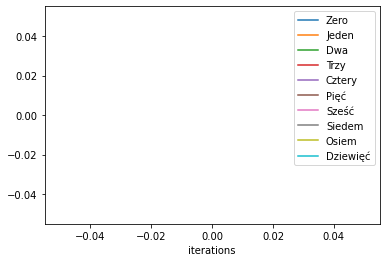

In [107]:
for perceptron in perceptrons:
  plot.plot(range(len(perceptron.errors)), perceptron.errors)
plot.legend(['Zero', 'Jeden', 'Dwa', 'Trzy', 'Cztery', 'Pięć', 'Sześć', 'Siedem', 'Osiem', 'Dziewięć'])
plot.xlabel("iterations")
plot.show()
#plt.savefig('learning_curve' + '.pdf')